### 영상처리와 컴퓨터 비전 개요

1. 입력 영상에 포함된 잡음 제거
2. 영상의 대비 개선 또는 선명하게 하기
3.영상 중 관심 영역 강조 또는 분할
4.영상 파일 압축
5.네트워크를 통한 영상 전송
6.영상의 검색 또는 영상의 분류
7.영상속 객체 인식

하려는 작업의 영역=> domain  deeplearning은 method
현장에서 문제를 만들어 내는 부분(인지 과학)



In [1]:
# -*- coding: utf-8 -*-

In [2]:
import numpy
import matplotlib.pyplot as plt

In [3]:
import cv2

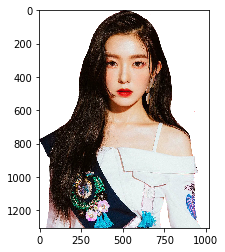

In [4]:
file_path='C:/Users/edu/Desktop/장현석/files/irene.png'
img=plt.imread(file_path)
plt.imshow(img)

In [5]:
img[:700,:500,0]=1.0

In [6]:
img[:700,500:,0:3]=1-img[:700,500:,0:3]

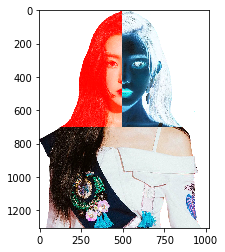

In [7]:
plt.imshow(img)

In [8]:
print(cv2.__version__)
print(numpy.__version__)
import matplotlib
print(matplotlib.__version__)
import tensorflow
print(tensorflow.__version__)

3.4.7
1.16.4
2.2.4
1.9.0


In [9]:
imageFile='C:/Users/edu/Desktop/OpenCV_data/OpenCV_data/data/lena.jpg'
imageFile2='C:/Users/edu/Desktop/irene.jpg'
img=cv2.imread(imageFile2, 1)
cv2.imshow('Lena Color',img[300:,:,:])
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
cv2.imwrite('C:/Users/edu/Desktop/out/irene.bmp',img)
cv2.imwrite('C:/Users/edu/Desktop/out/irene.png',img)
cv2.imwrite('C:/Users/edu/Desktop/out/irene2.png',img,[cv2.IMWRITE_PNG_COMPRESSION,9])
cv2.imwrite('C:/Users/edu/Desktop/out/irene2.jpg',img,[cv2.IMWRITE_JPEG_QUALITY,50])

True

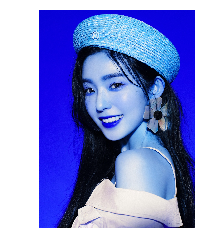

In [11]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2=img[:,:,::-1]
plt.axis('off')
plt.imshow(img)

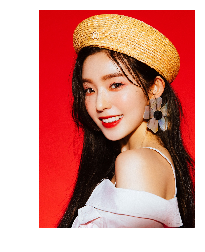

In [12]:
plt.axis('off')
plt.imshow(img2)

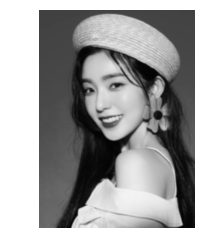

In [13]:
imgGray=cv2.imread(imageFile2, cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(imgGray, cmap='gray',interpolation='bicubic')
plt.show()

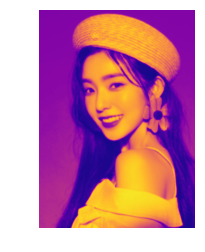

In [14]:
plt.axis('off')
plt.imshow(imgGray,cmap='plasma',interpolation='bicubic')
plt.show()

#### 비디오 처리

In [27]:
import cv2
### cap=cv2.VideoCapture(0)
cap=cv2.VideoCapture('C:/Users/edu/Desktop/OpenCV_data/OpenCV_data/data/vtest.avi')
frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size= ',frame_size)

frame_size=  (768, 576)


In [26]:
while True:
    retval,frame=cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)
    key=cv2.waitKey(25)
    if key==27: ###ESC key
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

In [30]:
retval,frame=cap.read()

In [31]:
retval

True

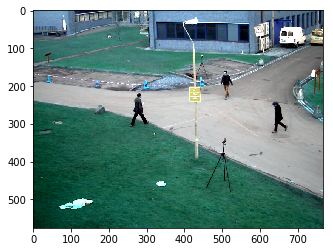

In [33]:
plt.imshow(frame)

#### matplotlib으로 동영상 불러오기

In [ ]:
cap=cv2.VideoCapture('C:/Users/edu/Desktop/OpenCV_data/OpenCV_data/data/vtest.avi')
plt.ion()
fig=plt.figure(figsize=(10,6))
plt.axis('off')
fig.canvas.set_window_title('Video Capture')


In [37]:
%matplotlib inline

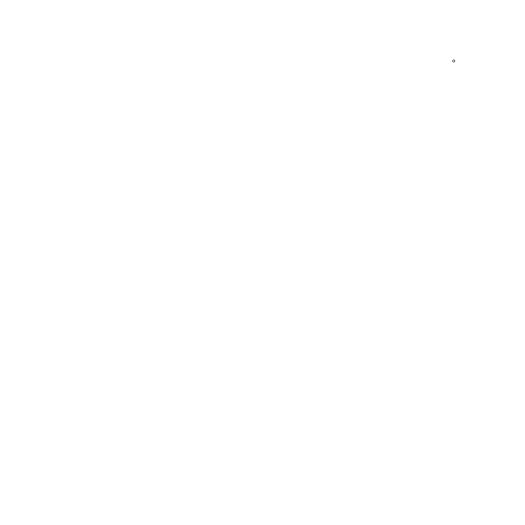

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

In [41]:
import cv2
import numpy as np

img=np.zeros(shape=(512,512,3),dtype=np.uint8)+ 255


In [50]:
pt1 =100,100
pt2= 400,400
cv2.rectangle(img,pt1,pt2,(0,255,0),2)
cv2.line(img,(0,0),(500,0),(255,0,0),5)
cv2.line(img,(0,0),(0,500),(0,0,255),100)
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [53]:
import cv2
cap=cv2.VideoCapture('C:/Users/edu/Desktop/OpenCV_data/OpenCV_data/data/vtest.avi')
frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size= ',frame_size)

fourcc=cv2.VideoWriter_fourcc(*'XVID')
out1=cv2.VideoWriter('C:/Users/edu/Desktop/out/record0.mp4',fourcc,20.0,frame_size)
out2=cv2.VideoWriter('./data/record1.mp4',fourcc,20.0,frame_size,isColor=False)

frame_size=  (768, 576)


In [54]:
while True:
    retval,frame= cap.read()
    if not retval:
        break
    out1.write(frame)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    out2.write(gray)
    cv2.imshow('frame',frame)
    cv2.imshow('gray',gray)
    key=cv2.waitKey(25)
    if key==27:
        break
        
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()